# Importation des librairies et des données des gisements

In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

#data to learn
data = pd.read_csv('gisementLearn.txt')

#data to learn with no label
data_noLabel=pd.read_csv('gisementTestNolabel.txt')


En analysant les données on voit que certains colonnes sont labélisés. On va utiliser un LabelEncoder() qui va attribuer une valeur numérique pour chaque label différent de chaque colonne labélisée.

In [2]:
label_encoder = preprocessing.LabelEncoder()
data["AGE"]=label_encoder.fit_transform(data["AGE"])
data["ROCK"]=label_encoder.fit_transform(data["ROCK"])
data["OR"]=label_encoder.fit_transform(data["OR"])

# Statistiques descriptives des données

array([[<AxesSubplot:title={'center':'X_COORD'}>,
        <AxesSubplot:title={'center':'Y_COORD'}>,
        <AxesSubplot:title={'center':'BOUGUER'}>,
        <AxesSubplot:title={'center':'GRTOPISO'}>,
        <AxesSubplot:title={'center':'PROF_MOHO'}>],
       [<AxesSubplot:title={'center':'S_DEPTH'}>,
        <AxesSubplot:title={'center':'TOPO_ISO'}>,
        <AxesSubplot:title={'center':'BENPENTE'}>,
        <AxesSubplot:title={'center':'DIST_SEIS'}>,
        <AxesSubplot:title={'center':'DIST_SUBS'}>],
       [<AxesSubplot:title={'center':'DIST_VOL'}>,
        <AxesSubplot:title={'center':'NBR_SEISM'}>,
        <AxesSubplot:title={'center':'DIST_112'}>,
        <AxesSubplot:title={'center':'DIST_135'}>,
        <AxesSubplot:title={'center':'DIST_157'}>],
       [<AxesSubplot:title={'center':'DIST_180'}>,
        <AxesSubplot:title={'center':'DIST_22'}>,
        <AxesSubplot:title={'center':'DIST_45'}>,
        <AxesSubplot:title={'center':'DIST_67'}>,
        <AxesSubplot:title={'ce

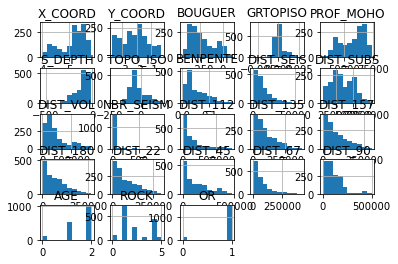

In [3]:
data.hist()

C:\Users\axelc\AppData\Local\Temp/ipykernel_6940/1698767592.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


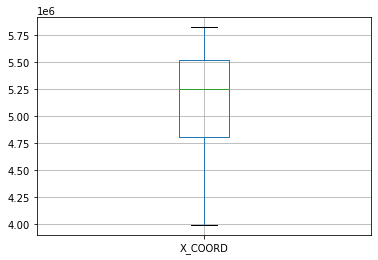

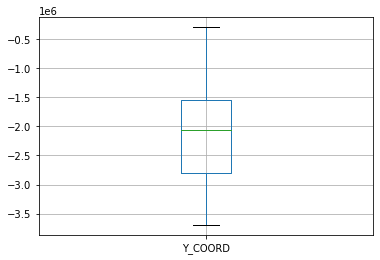

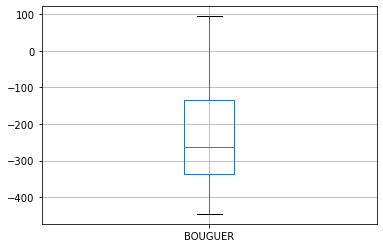

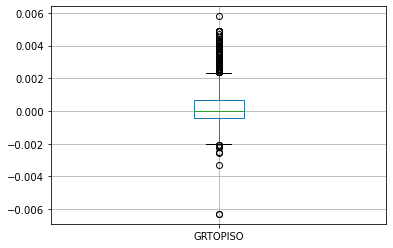

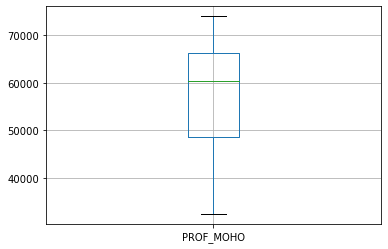

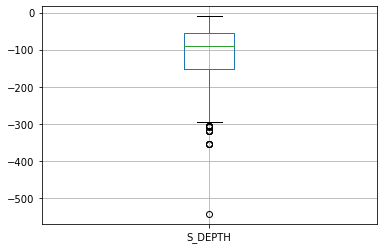

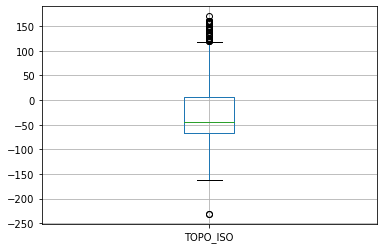

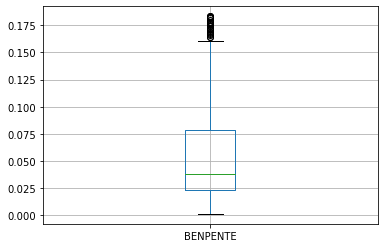

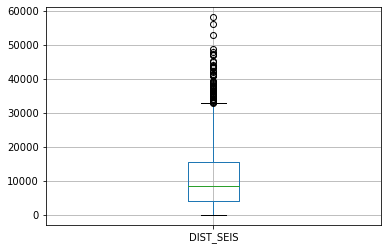

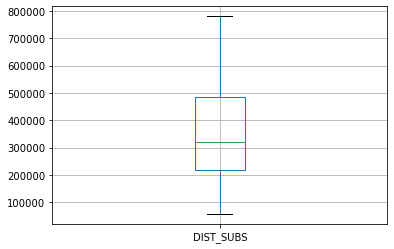

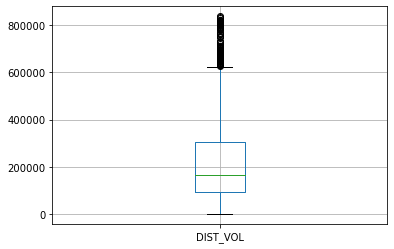

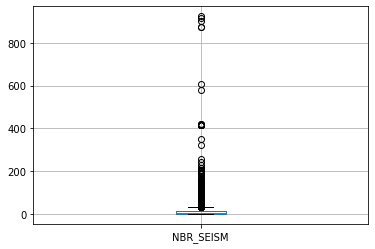

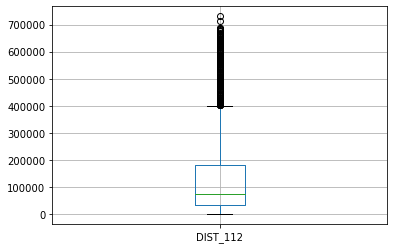

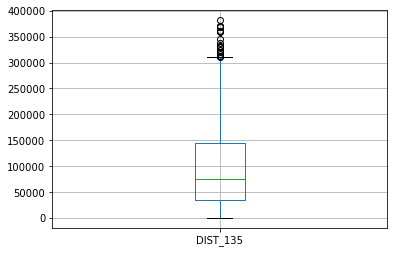

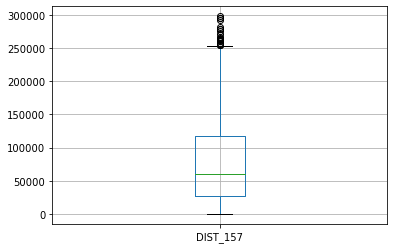

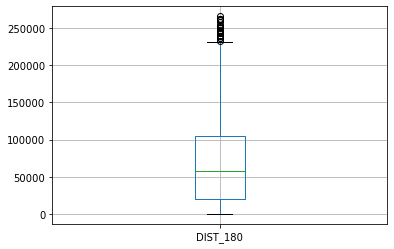

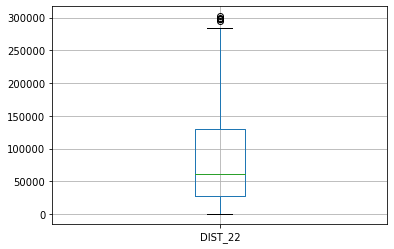

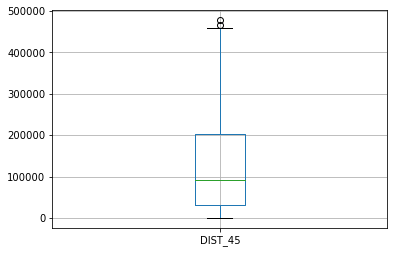

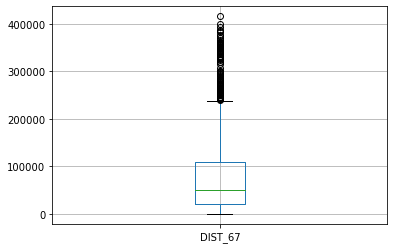

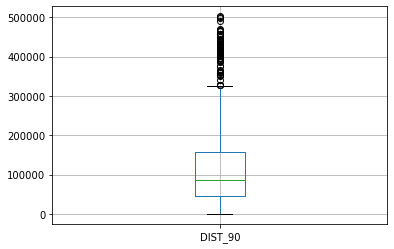

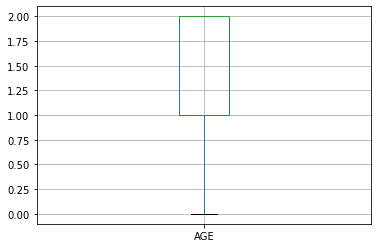

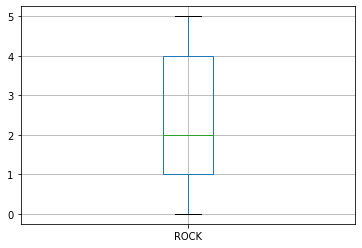

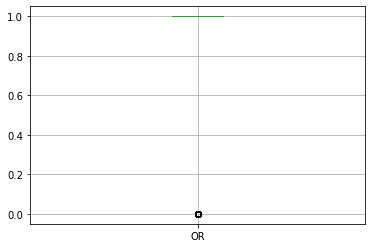

In [4]:
for column in data:
    plt.figure()
    data.boxplot([column])

<AxesSubplot:>

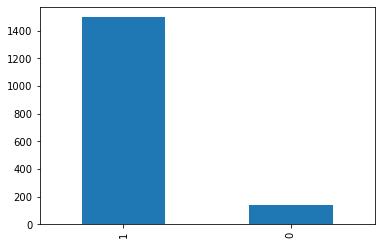

In [5]:
data['OR'].value_counts().plot(kind='bar')

In [6]:
data.var()

X_COORD      2.251605e+11
Y_COORD      8.009564e+11
BOUGUER      1.667143e+04
GRTOPISO     1.599577e-06
PROF_MOHO    1.025979e+08
S_DEPTH      5.356953e+03
TOPO_ISO     4.070134e+03
BENPENTE     1.457432e-03
DIST_SEIS    8.936634e+07
DIST_SUBS    2.737663e+10
DIST_VOL     3.891478e+10
NBR_SEISM    5.120194e+03
DIST_112     2.506202e+10
DIST_135     6.014005e+09
DIST_157     4.269900e+09
DIST_180     3.587042e+09
DIST_22      4.793832e+09
DIST_45      1.391661e+10
DIST_67      6.535482e+09
DIST_90      8.625245e+09
AGE          3.895716e-01
ROCK         2.101816e+00
OR           7.690345e-02
dtype: float64

# Apprentissage et validation

In [7]:
X=data.drop(columns=['OR'])
y=data['OR']


X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33, shuffle=True)

scaler = StandardScaler()
# we fit the train data
scaler.fit(X_train)
# scaling the train data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
print(X_train.var())
print(X_test.var())

1.0
1.0221040735381062


In [9]:
parameters = {'solver':('adam', 'sgd'), 'alpha':[0.0001, 0.0005,0.001], 'learning_rate':('constant','adaptive'),'max_iter':[1000]}

#MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)[source]

MLP=MLPClassifier()
gs = GridSearchCV(MLP, parameters)
gs.fit(X_train,y_train)

C:\Users\axelc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\axelc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\axelc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\axelc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\axelc\anaconda3\lib\site-packages\sklearn\neural_network\_m

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001],
                         'learning_rate': ('constant', 'adaptive'),
                         'max_iter': [1000], 'solver': ('adam', 'sgd')})

In [10]:
gs.best_params_

{'alpha': 0.0001,
 'learning_rate': 'constant',
 'max_iter': 1000,
 'solver': 'sgd'}

0.9954296160877514
0.9146567717996289


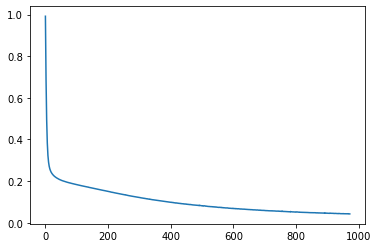

In [11]:
clf=MLPClassifier(alpha=0.01,learning_rate='adaptive',max_iter=1000,solver='adam')
#clf=MLPClassifier()
clf.fit(X_train,y_train)
plt.figure()
plt.plot(clf.loss_curve_)
y_test_pred = clf.predict(X_test)
#clf.score(X_test, y_test)
Y_train_pred=clf.predict(X_train)
print(accuracy_score(Y_train_pred, y_train))
print(accuracy_score(y_test_pred, y_test))

In [12]:

print(confusion_matrix(y_test_pred,y_test))


print(classification_report(y_test_pred, y_test))



[[ 17  21]
 [ 25 476]]
              precision    recall  f1-score   support

           0       0.40      0.45      0.43        38
           1       0.96      0.95      0.95       501

    accuracy                           0.91       539
   macro avg       0.68      0.70      0.69       539
weighted avg       0.92      0.91      0.92       539



# Oversampling

0.8961038961038961
              precision    recall  f1-score   support

           0       0.43      0.36      0.39        50
           1       0.94      0.95      0.94       489

    accuracy                           0.90       539
   macro avg       0.68      0.66      0.67       539
weighted avg       0.89      0.90      0.89       539

[[ 18  32]
 [ 24 465]]


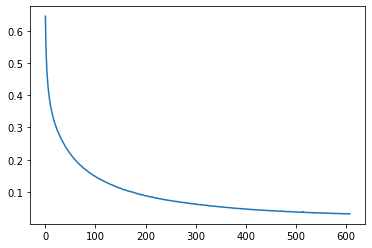

In [13]:
from imblearn.over_sampling import BorderlineSMOTE
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X_train, y_train)
clf.fit(X_resampled,y_resampled)
plt.figure()
plt.plot(clf.loss_curve_)
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))
print(confusion_matrix(y_test_pred,y_test))

0.8961038961038961
              precision    recall  f1-score   support

           0       0.48      0.37      0.42        54
           1       0.93      0.95      0.94       485

    accuracy                           0.90       539
   macro avg       0.70      0.66      0.68       539
weighted avg       0.89      0.90      0.89       539

0.9016697588126159
              precision    recall  f1-score   support

           0       0.36      0.37      0.36        41
           1       0.95      0.95      0.95       498

    accuracy                           0.90       539
   macro avg       0.65      0.66      0.65       539
weighted avg       0.90      0.90      0.90       539

0.8998144712430427
              precision    recall  f1-score   support

           0       0.48      0.38      0.43        52
           1       0.94      0.95      0.95       487

    accuracy                           0.90       539
   macro avg       0.71      0.67      0.69       539
weighted avg     

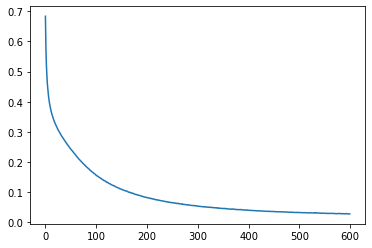

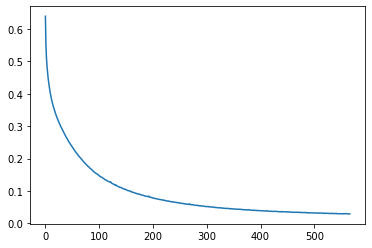

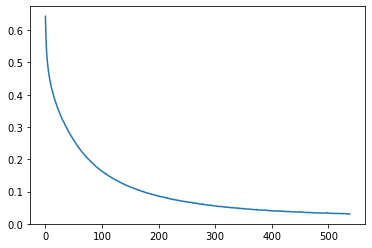

In [14]:



from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)
clf.fit(X_resampled,y_resampled)
plt.figure()
plt.plot(clf.loss_curve_)
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))


from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.svm import LinearSVC
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
clf.fit(X_resampled, y_resampled)
clf.predict(X_test)
plt.figure()
plt.plot(clf.loss_curve_)
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))

X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)
clf.fit(X_resampled, y_resampled)
clf.predict(X_test)
plt.figure()
plt.plot(clf.loss_curve_)
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))

<AxesSubplot:>

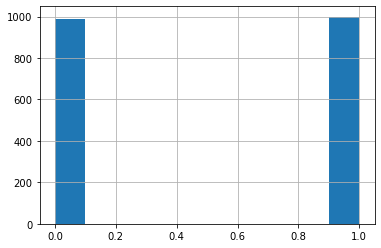

In [15]:
y_resampled.hist()

over and under sampling at the  same time (but useless here)

0.9035250463821892
              precision    recall  f1-score   support

           0       0.45      0.40      0.42        48
           1       0.94      0.95      0.95       491

    accuracy                           0.90       539
   macro avg       0.70      0.67      0.68       539
weighted avg       0.90      0.90      0.90       539



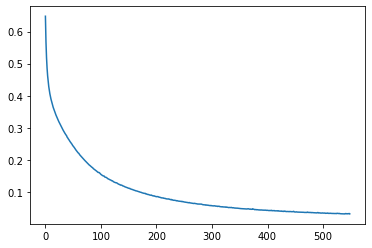

In [16]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
clf.fit(X_resampled,y_resampled)
plt.figure()
plt.plot(clf.loss_curve_)
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_test_pred, y_test))
print(classification_report(y_test_pred, y_test))

# Essayer d'enlever les valeurs aberrantes 

# Prédiction sur données non supervisées

In [17]:
data_noLabel["AGE"]=label_encoder.fit_transform(data_noLabel["AGE"])
data_noLabel["ROCK"]=label_encoder.fit_transform(data_noLabel["ROCK"])

scaler = StandardScaler()
# we fit the train data
scaler.fit(data_noLabel)
# scaling the train data
data_noLabel = scaler.transform(data_noLabel)


response=clf.predict(data_noLabel)

In [18]:
response

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,